Objective

Clensing test data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy_financial as npf

In [7]:
#pip install numpy-financial

In [8]:
!ls

Data
Data_Clensing_Test.ipynb
Data_Clensing_Train.ipynb
Modelling.ipynb
Project Proposal.pdf
README.md
Split_Dataframe_Train_Test.ipynb


In [9]:
df = pd.read_csv('Data/Loan_Default_test.csv',index_col=0)

In [10]:
df.head()

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1,Status
ID,,,,,,,,,,,,,,,,,,,,,
49802,2019,cf,Female,nopre,type2,p3,l1,nopc,b/c,116500,...,EXP,679,CIB,45-54,to_inst,84.420290,North,direct,41.0,0
171958,2019,cf,Sex Not Available,pre,type1,p4,l1,nopc,nob/c,236500,...,EXP,853,EXP,25-34,to_inst,88.246269,south,direct,44.0,0
148174,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,136500,...,CRIF,598,EXP,65-74,to_inst,19.279661,south,direct,41.0,0
78500,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,256500,...,EXP,776,EXP,65-74,to_inst,36.228814,North,direct,32.0,0
64562,2019,cf,Female,nopre,type1,p1,l1,nopc,nob/c,686500,...,EXP,653,CIB,35-44,not_inst,81.921241,North,direct,48.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37168 entries, 49802 to 41080
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       37168 non-null  int64  
 1   loan_limit                 36356 non-null  object 
 2   Gender                     37168 non-null  object 
 3   approv_in_adv              36926 non-null  object 
 4   loan_type                  37168 non-null  object 
 5   loan_purpose               37140 non-null  object 
 6   Credit_Worthiness          37168 non-null  object 
 7   open_credit                37168 non-null  object 
 8   business_or_commercial     37168 non-null  object 
 9   loan_amount                37168 non-null  int64  
 10  rate_of_interest           28110 non-null  float64
 11  Interest_rate_spread       28050 non-null  float64
 12  Upfront_charges            27308 non-null  float64
 13  term                       37156 non-null 

In [12]:
df.shape

(37168, 33)

In [13]:
df = df.drop(['dtir1','year'],axis =1)

In [14]:
df.isna().sum()

loan_limit                    812
Gender                          0
approv_in_adv                 242
loan_type                       0
loan_purpose                   28
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest             9058
Interest_rate_spread         9118
Upfront_charges              9860
term                           12
Neg_ammortization              31
interest_only                   0
lump_sum_payment                0
property_value               3721
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                       2249
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                            60
submission_of_application      60
LTV                          3721
Region                          0
Security_Type 

Below function is developed to decide for imputation strategy repeatedly to calculate mean, meadian, mode and draw histograms for different variables.

In [15]:
def missingval(data,bins=50):

    '''
    This will print histogram with the variable statstics of mean, median and mode.
    
    Parameters :

    data - respective variable
    bins - no of bins in the histogram

    '''
    
    plt.hist(data, bins=50, edgecolor='black')
    plt.xticks()
    plt.xlabel('Value Range')
    plt.ylabel('Frequency')
    plt.title('Histogram of Your Data')
    plt.xlim(data.min(), data.max())
    plt.show()
    
    mean = data.mean()
    median = data.median()
    mode = data.mode()
    
    print(f'Mean: {mean}')
    print(f'Median: {median}')
    print(f'Mode: {mode}')

### Missing values of LTV

LTV represent the ratio between loan amount and property value. Therefore ratio of more than 100 is unrealistic. This may occur due to neglegence at the point of granting the loan or intentionally commiting. These outliers might distort the model prediction. Therefore removing from the database.

In [16]:
df = df.drop(df[df['LTV'] > 100].index)

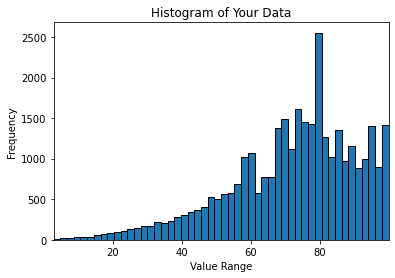

Mean: 72.0060474106283
Median: 75.07716049
Mode: 0    81.25
dtype: float64


In [17]:
missingval(df['LTV'])

As the distribution is skewed appropriate imputation for dataset would be median for LTV

In [18]:
df['LTV'].fillna(df['LTV'].median(), inplace=True)

### Approximate Missing Property Values

Property value field contains about 15,000 missing values. If remove from dataframe will be removing 10% of the database. Therfore to alleviate the issue approximate the property value using the loan amount and LTV value.

In [19]:
df['property_value'].fillna(df['loan_amount']*100 / df['LTV'], inplace=True)

### Missing Values of Rate of Interest

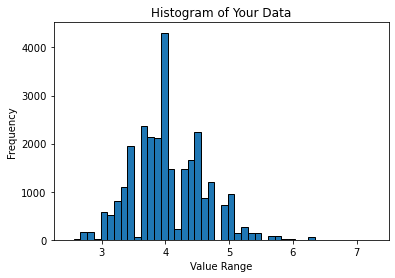

Mean: 4.044028428392634
Median: 3.99
Mode: 0    3.99
dtype: float64


In [20]:
missingval(df['rate_of_interest'])

As above distribution is bit skewed the imputation strategy is to use median

In [21]:
df['rate_of_interest'].fillna(df['rate_of_interest'].median(), inplace=True)

There is one record with 0% interest which is unrealistic. Therefore filterout particular record from the dataframe.

In [22]:
df = df[df['rate_of_interest']>0]

### Missing Values of Interest Rate Spread

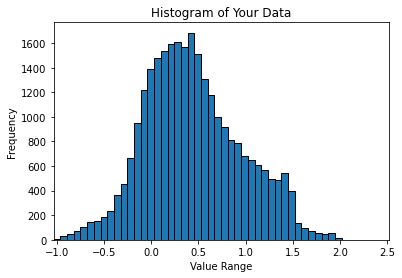

Mean: 0.44306677656333987
Median: 0.3915
Mode: 0   -0.038
1    0.252
dtype: float64


In [23]:
missingval(df['Interest_rate_spread'])

As above distribution is some what normally distributed, it is decided to use mean as the imputation strategy for interest rate spread. In making the decision taken conservative approach where banks tend to play with spreads and missing values to include the higher of the statistics. 

In [24]:
df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].mean(), inplace=True)

### Missing Values of Upfront Charges

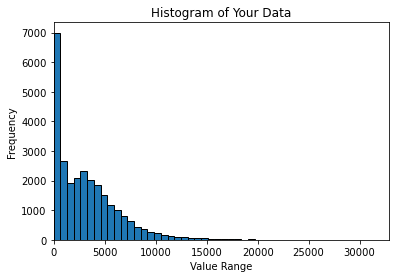

Mean: 3221.306797717651
Median: 2605.49
Mode: 0    0.0
dtype: float64


In [25]:
missingval(df['Upfront_charges'])

Usually the upfront charge is certain % of the loan. Therefore calculating the upfront charge % column.

In [26]:
df['Upfront_charges%']=df['Upfront_charges']/df['loan_amount']

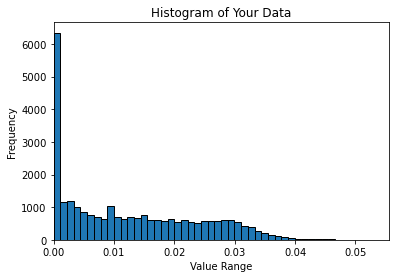

Mean: 0.012428569722017216
Median: 0.009940409276944066
Mode: 0    0.0
dtype: float64


In [27]:
missingval(df['Upfront_charges%'])

In [28]:
df['Upfront_charges%'].fillna(df['Upfront_charges%'].median(), inplace=True)

Filling Missing values in upfront charges

In [29]:
df['Upfront_charges'].fillna(df['loan_amount'] * df['Upfront_charges%'], inplace=True)

### Missing Values of Term

The term contains decimal percentage of missing values. Therefore those 41 rows to be dropped from the database.

In [30]:
df = df.dropna(subset =['term'])

### Missing Values of Monthly Income

As missing values of monthly income varies from person to person cannot be determine directly. Also there are some records have 0 income which is impossible. Therefore those rows removed from the dataframe.

In [31]:
df = df[df['income']>0]

In [32]:
df.isna().sum()

loan_limit                   777
Gender                         0
approv_in_adv                231
loan_type                      0
loan_purpose                  24
Credit_Worthiness              0
open_credit                    0
business_or_commercial         0
loan_amount                    0
rate_of_interest               0
Interest_rate_spread           0
Upfront_charges                0
term                           0
Neg_ammortization             30
interest_only                  0
lump_sum_payment               0
property_value                 0
construction_type              0
occupancy_type                 0
Secured_by                     0
total_units                    0
income                         0
credit_type                    0
Credit_Score                   0
co-applicant_credit_type       0
age                            0
submission_of_application      0
LTV                            0
Region                         0
Security_Type                  0
Status    

In [33]:
df.shape

(34208, 32)

### Calculate Monthly Loan Payment

Converting rate of interest and spread to % terms

In [34]:
#df['rate_of_interest'] = df['rate_of_interest']/100
#df['Interest_rate_spread'] = df['Interest_rate_spread']/100

Calculate monthly premium based on rate of interest, term and loan amount using loan ammmortization

In [35]:
df['monthly_premium'] = npf.pmt(df['rate_of_interest']/(12*100), df['term'], df['loan_amount'])*-1

Calculate monthly premium to income ratio

In [36]:
df['PTI']=df['monthly_premium']/df['income']

Cleansing PTI column, where PMI column greater than 1 is not possible. If greater than 1 means that loan premium is greater than the income. These impossible scenarios to remove from the dataframe.

In [37]:
df = df[df['PTI']<1]

In [38]:
df.shape

(34087, 34)

In [39]:
df['PTI'].max()

0.9955067144976537

In [40]:
df.isna().sum()

loan_limit                   770
Gender                         0
approv_in_adv                231
loan_type                      0
loan_purpose                  24
Credit_Worthiness              0
open_credit                    0
business_or_commercial         0
loan_amount                    0
rate_of_interest               0
Interest_rate_spread           0
Upfront_charges                0
term                           0
Neg_ammortization             28
interest_only                  0
lump_sum_payment               0
property_value                 0
construction_type              0
occupancy_type                 0
Secured_by                     0
total_units                    0
income                         0
credit_type                    0
Credit_Score                   0
co-applicant_credit_type       0
age                            0
submission_of_application      0
LTV                            0
Region                         0
Security_Type                  0
Status    

### Missing Values of Loan Limit

For loan limit imputation strategy used as most common category.

In [41]:
most_common = df['loan_limit'].mode()[0]
df['loan_limit'].fillna(most_common, inplace=True)

In [42]:
df.isna().sum()

loan_limit                     0
Gender                         0
approv_in_adv                231
loan_type                      0
loan_purpose                  24
Credit_Worthiness              0
open_credit                    0
business_or_commercial         0
loan_amount                    0
rate_of_interest               0
Interest_rate_spread           0
Upfront_charges                0
term                           0
Neg_ammortization             28
interest_only                  0
lump_sum_payment               0
property_value                 0
construction_type              0
occupancy_type                 0
Secured_by                     0
total_units                    0
income                         0
credit_type                    0
Credit_Score                   0
co-applicant_credit_type       0
age                            0
submission_of_application      0
LTV                            0
Region                         0
Security_Type                  0
Status    

### Missing Values of approve in advance, loan purpose and neg_ammortization

As those are much personalized information those records have removed from the database

In [43]:
df = df.dropna()

In [44]:
df.shape

(33804, 34)

In [45]:
df.isna().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
Upfront_charges%             0
monthly_

### Composition of Target Column

In [46]:
df['Status'].value_counts()

0    25777
1     8027
Name: Status, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33804 entries, 49802 to 41080
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_limit                 33804 non-null  object 
 1   Gender                     33804 non-null  object 
 2   approv_in_adv              33804 non-null  object 
 3   loan_type                  33804 non-null  object 
 4   loan_purpose               33804 non-null  object 
 5   Credit_Worthiness          33804 non-null  object 
 6   open_credit                33804 non-null  object 
 7   business_or_commercial     33804 non-null  object 
 8   loan_amount                33804 non-null  int64  
 9   rate_of_interest           33804 non-null  float64
 10  Interest_rate_spread       33804 non-null  float64
 11  Upfront_charges            33804 non-null  float64
 12  term                       33804 non-null  float64
 13  Neg_ammortization          33804 non-null 

After all clensing activities dataframe reduced to 135191 records with 33 features and 1 target column. This is 9% reduction of records from the original database.

Dataframe exported to a csv file.

In [48]:
df.to_csv('data/Loan_Default_test_cleaned.csv')